In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [6]:
DATA_PATH='/home/yifei/Downloads/PetImages'
CATEGORIES=['Dog','Cat']

for category in CATEGORIES:
    my_path=os.path.join(DATA_PATH,category)
    for image in os.listdir(my_path):
        img_array=cv2.imread(os.path.join(my_path,image),cv2.IMREAD_GRAYSCALE) #this will be in grayscale
        #plt.imshow(img_array,cmap='gray')
        #plt.show()


/home/yifei/Downloads/PetImages/Cat
[[129 135 141 ... 188 189 190]
 [130 134 139 ... 188 189 191]
 [131 134 138 ... 189 190 191]
 ...
 [ 54  83  83 ... 255 255 255]
 [ 57  83  78 ... 255 255 255]
 [ 54  78  70 ... 255 255 255]]


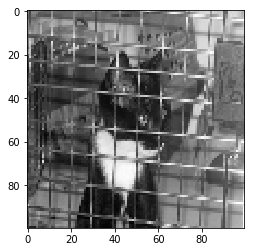

In [22]:
IMG_SIZE=100
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')

In [31]:
x_train=[] #create an empty list for training data
def create_training_data():
    for category in CATEGORIES:
        my_path=os.path.join(DATA_PATH,category)
        classnum=CATEGORIES.index(category) #gives you the index at that category (0 or 1)
        
        for image in os.listdir(my_path):
            try:
                img_array=cv2.imread(os.path.join(my_path,image),cv2.IMREAD_GRAYSCALE) #this will be in grayscale
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) #resize every image before passing it in
                x_train.append([new_array,classnum])
            except Exception as e:
                pass
            

create_training_data()
print(len(x_train))

24946


In [55]:
#shuffle data 
import random
random.shuffle(x_train)

print(x_train[0])

[array([[152, 154, 154, ..., 245, 245, 246],
       [152, 154, 154, ..., 247, 247, 248],
       [153, 153, 154, ..., 246, 247, 248],
       ...,
       [155, 209, 185, ..., 218, 223, 229],
       [162, 157, 191, ..., 224, 198, 206],
       [187, 156, 151, ..., 210, 222, 220]], dtype=uint8), 1]


In [84]:
import pickle
x=[]
y=[]
for features, label in x_train:
    x.append(features)
    y.append(label) #create lists of features and labels 
#we cannot pass a list into neural network, we need to use a numpy array
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1) #1 is for grayscale, -1 represents unknown dimension for np to resolve
print(x.shape)

#save data
pickle_out=open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close();

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close();

print(len(y))

(24946, 100, 100, 1)
24946


In [2]:
import pickle
pickle_in=open('x.pickle','rb')
x=pickle.load(pickle_in)

pickle_in=open('y.pickle','rb')
y=pickle.load(pickle_in)

x=x/255.0

In [3]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True
        
def createModel():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=x.shape[1:]),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(), #flattens the dataset for our input layer
        tf.keras.layers.Dense(512,activation=tf.nn.relu), #hidden layer
        tf.keras.layers.Dense(1,activation='sigmoid') #sigmoid for final layer
    ])
    return model

call=myCallback()
model=createMode()


Instructions for updating:
Colocations handled automatically by placer.
[[[0.59607843]
  [0.60392157]
  [0.60392157]
  ...
  [0.96078431]
  [0.96078431]
  [0.96470588]]

 [[0.59607843]
  [0.60392157]
  [0.60392157]
  ...
  [0.96862745]
  [0.96862745]
  [0.97254902]]

 [[0.6       ]
  [0.6       ]
  [0.60392157]
  ...
  [0.96470588]
  [0.96862745]
  [0.97254902]]

 ...

 [[0.60784314]
  [0.81960784]
  [0.7254902 ]
  ...
  [0.85490196]
  [0.8745098 ]
  [0.89803922]]

 [[0.63529412]
  [0.61568627]
  [0.74901961]
  ...
  [0.87843137]
  [0.77647059]
  [0.80784314]]

 [[0.73333333]
  [0.61176471]
  [0.59215686]
  ...
  [0.82352941]
  [0.87058824]
  [0.8627451 ]]]


In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.fit(x, y, batch_size=32, validation_split=0.1, epochs=20, callbacks=[call])

Train on 22451 samples, validate on 2495 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
22451/22451 [==============================] - 1057s 47ms/sample - loss: 0.9902 - acc: 0.6655 - val_loss: 0.5484 - val_acc: 0.7315
Epoch 2/20
22451/22451 [==============================] - 1045s 47ms/sample - loss: 0.4624 - acc: 0.7813 - val_loss: 0.5643 - val_acc: 0.7259
Epoch 3/20
22451/22451 [==============================] - 1196s 53ms/sample - loss: 0.2964 - acc: 0.8717 - val_loss: 0.6161 - val_acc: 0.7443
Epoch 4/20
22432/22451 [============================>.] - ETA: 1s - loss: 0.1224 - acc: 0.9561
Reached 95% accuracy so cancelling training!
22451/22451 [==============================] - 1387s 62ms/sample - loss: 0.1223 - acc: 0.9562 - val_loss: 0.8194 - val_acc: 0.7375


In [5]:
model.evaluate(x,y)

24946/24946 [==============================] - 148s 6ms/sample - loss: 0.1246 - acc: 0.9670


[0.1246452777072516, 0.9670488]